In [1]:
import pandas as pd
import numpy as np
from datetime import date
import glob
import xz.open
import matplotlib

In [2]:
#main role list
mainrole = pd.read_csv('../output/recommend_maintable.csv')
#target shoptrade_id list(from bonus activity)
shoptrade_id_list = pd.read_csv('../ref/g1jp_bonus_activity_list.csv')

In [3]:
shoptrade_id_list

,goodid,diamond_count
0,880001,700
1,880002,150
2,880003,80
3,880004,3480
4,880005,120
...,...,...
117,880118,80
118,880119,270
119,880120,5680
120,880121,2980


In [4]:
start_time = "2022-08-20"
end_time = date.today()

logname = 'shoptrade'


shoptrade_diamond = {60134:3480,60136:3480,60137:2680,60138:2680,60147:3480,60146:6480,60163:80,60139:350,60154:80,60149:2380,60172:80,60161:2000,60203:80,60201:80,60176:4300,60177:690,60191:880,60235:80,60237:800,60252:640,60253:80,60265:80,60266:80,60270:480,60251:160,60272:80,60286:700,60296:80,10029:40,64063:1700,64059:5000,60121:750,60123:560,60122:320,10026:800,10030:15,10026:5,10027:20,10028:80,41006:40,41008:360,41055:500,10033:99,10034:990,10048:50,10019:300,10020:600,10442:300,1:20,32:20,34:25,60118:1980,60119:1490,60120:3000,60121:2990,60140:199,60141:99,64101:299,60456:300,60148:99,64063:1700,59998:499,59999:25,60000:59,60111:500,60112:1000,60113:5000,60114:3000,60115:3000}

#gacha_id_list = [62001,62005,62003,62004]
#card_fortune_store_id_list = [210,810,1300,1400,4050,4160,4170,4200,4210,4220,4230,4800,4810]
#male_outfit_fortune_store_id_list = [51002,51014,51050,51032,51026]
#female_outfit_fortune_store_id_list = [51003,51015,51051,51033,51027]

shoptrade_items = pd.DataFrame()



for i in pd.period_range(start_time, end_time):
    data_path = glob.glob('/home/xl_daily_update/raw_data/serverlog/G1JP/' + '/*/' + logname + '.log.' + str(i) + '*', recursive = True)
    
    for j in data_path:
        with xz.open(j, 'rt', encoding = 'utf-8') as f:
            
            df_shoptrade_raw = pd.read_csv(f, header = None, sep = '\x01', usecols = [9,10,13,14,16,17], names = ["userid", "roleid",'shoptrade_id','count','freemoney','paidmoney'])
            
            df_shoptrade_raw = df_shoptrade_raw[(df_shoptrade_raw['userid'].isin(mainrole.userid)) & (df_shoptrade_raw['roleid'].isin(mainrole.roleid))]
            
            df_target_item = df_shoptrade_raw[df_shoptrade_raw['shoptrade_id'].isin(shoptrade_id_list.goodid)]
            shoptrade_items = pd.concat([shoptrade_items,df_target_item])
            
            
shoptrade_items

,userid,roleid,shoptrade_id,count,freemoney,paidmoney
1,13095678,327501263,880075,2,600,0
47,13014918,23500033,880075,1,300,0
79,13095678,327501263,880075,1,300,0
145,13207287,406010902,880075,1,251,49
146,13207287,406010902,880075,1,0,300
...,...,...,...,...,...,...
423,13937647,9008548,880117,1,64,0
425,13937647,9008548,880117,1,64,0
426,13896275,9008576,880117,1,64,0
512,13941468,32508317,880117,1,64,0


In [5]:
shoptrade_items[shoptrade_items['shoptrade_id'] == 880100]

,userid,roleid,shoptrade_id,count,freemoney,paidmoney
12029,13129496,337505571,880100,2,475,125
12049,13226797,231510705,880100,1,300,0
12060,13136524,357506233,880100,1,300,0
12073,13069302,16505661,880100,1,300,0
12114,13095837,318501325,880100,2,360,240
...,...,...,...,...,...,...
4955,13340462,304508867,880100,1,300,0
4997,13129496,337505571,880100,1,300,0
4,13588531,22507933,880100,1,300,0
478,13422510,32504904,880100,1,300,0


In [6]:
shoptrade_items['userrole'] = shoptrade_items.userid.map(str) + shoptrade_items.roleid.map(str)
shoptrade_items['total_money'] = shoptrade_items['freemoney'] + shoptrade_items['paidmoney']
shoptrade_items_2 = shoptrade_items.drop(['userid','roleid'], axis = 1)
shoptrade_items_count = shoptrade_items_2.groupby(['userrole','shoptrade_id'])['count'].agg([('buy_times','size'), ('total_count', 'sum')]).reset_index()
shoptrade_items_money_sum = shoptrade_items_2.groupby(['userrole','shoptrade_id'])['total_money'].sum().reset_index()

def avg_count(a , b):
    return round(a/b,0)
    
shoptrade_items_count['avg_buy_count'] = shoptrade_items_count.apply(lambda x : avg_count(x.total_count , x.buy_times), axis = 1).astype(int)


shoptrade_items_money_sum

,userrole,shoptrade_id,total_money
0,1008946753501071,880075,900
1,1008946753501071,880100,300
2,1062037123500404,880075,900
3,1067907816500137,880075,3000
4,1067907816500137,880076,4000
...,...,...,...
2780,9253593135500982,880078,320
2781,9283430155500092,880085,160
2782,9283430155500092,880113,128
2783,9283585125501628,880085,320


In [7]:
recommend_result = pd.read_csv("../output/recommended_result.csv", dtype = {'recommend_user' : object, 'similar' : object})
recommend_result


,recommend_user,similar
0,224413822509688,84714325558
1,224413822509688,85115821576
2,224413822509688,8581848273
3,224413822509688,863313372
4,224413822509688,11047060873
...,...,...
146822,1394146832508317,130661685489
146823,1394146832508317,130807876562
146824,1394146832508317,131491238290
146825,1394146832508317,131972174010


In [8]:
#switch to diamond consumption, in terns of total diamond consumption

shoptrade_money_consumption_pivot = shoptrade_items_money_sum.pivot(index = 'userrole', columns = 'shoptrade_id', values = 'total_money')

shoptrade_money_consumption_pivot = shoptrade_money_consumption_pivot.fillna(0)
shoptrade_money_consumption_pivot = shoptrade_money_consumption_pivot.astype(int)
shoptrade_money_consumption_pivot

#record of shoptrade money consumption for similar user
money_consumption_merge_similar = pd.merge(recommend_result, shoptrade_money_consumption_pivot, how = 'inner', left_on = ['similar'], right_on = ['userrole'])


In [9]:
userrole_payment_reference = pd.read_csv("../output/g1jp_userrole_payment_reference.csv", dtype = {'userrole' : object, 'payment_group' : object})
money_consumption_merge_similar_payment_ref = pd.merge(money_consumption_merge_similar, userrole_payment_reference, how = 'inner', left_on = ['recommend_user'], right_on = ['userrole'])
money_consumption_merge_similar_payment_ref = money_consumption_merge_similar_payment_ref.drop('userrole', axis = 1)
money_consumption_merge_similar_payment_ref = money_consumption_merge_similar_payment_ref.rename(columns = {'payment_group' : 'recommend_payment_group'})

money_consumption_merge_similar_payment_ref = pd.merge(money_consumption_merge_similar_payment_ref, userrole_payment_reference, how = 'inner', left_on = ['similar'], right_on = ['userrole'])
money_consumption_merge_similar_payment_ref = money_consumption_merge_similar_payment_ref.drop('userrole', axis = 1)
money_consumption_merge_similar_payment_ref = money_consumption_merge_similar_payment_ref.rename(columns = {'payment_group' : 'similar_user_payment_group'})
money_consumption_merge_similar_payment_ref = money_consumption_merge_similar_payment_ref.drop_duplicates()

money_consumption_merge_similar_payment_ref



,recommend_user,similar,880041,880042,880051,880052,880053,880054,880056,880057,...,880115,880116,880117,880118,880119,880120,880121,880122,recommend_payment_group,similar_user_payment_group
0,224413822509688,84714325558,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,V1,V2
1,3922331135500002,84714325558,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,V1,V2
2,487906533500003,84714325558,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,V2
3,578151933500002,84714325558,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,V2
4,580892553507797,84714325558,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,V2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78905,130278242105,130477773731,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,V6,V5
78906,130535784987,130477773731,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,V4,V5
78907,131491238290,130477773731,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,V7,V5
78908,131972174010,130477773731,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,V4,V5


In [10]:
money_consumption_merge_similar_payment_ref[(money_consumption_merge_similar_payment_ref['recommend_payment_group'] == 'V4') & (money_consumption_merge_similar_payment_ref['similar_user_payment_group'] == 'V5')].nunique()

recommend_user                136
similar                        70
880041                          1
880042                          4
880051                          2
                             ... 
880120                          2
880121                          1
880122                          2
recommend_payment_group         1
similar_user_payment_group      1
Length: 70, dtype: int64

In [11]:

#select the target group (based on payment category)
money_consumption_result_similar = money_consumption_merge_similar_payment_ref[(money_consumption_merge_similar_payment_ref['recommend_payment_group'] == 'V4') & (money_consumption_merge_similar_payment_ref['similar_user_payment_group'] == 'V5')]

money_consumption_result_similar

#record of shoptrade money consumption for recommended user
money_consumption_merge_recommended = pd.merge(recommend_result, shoptrade_money_consumption_pivot, how = 'inner', left_on = ['recommend_user'], right_on = ['userrole'])


userrole_payment_reference = pd.read_csv("../output/g1jp_userrole_payment_reference.csv", dtype = {'userrole' : object, 'payment_group' : object})
money_consumption_merge_recommended_payment_ref = pd.merge(money_consumption_merge_recommended, userrole_payment_reference, how = 'inner', left_on = ['recommend_user'], right_on = ['userrole'])
money_consumption_merge_recommended_payment_ref = money_consumption_merge_recommended_payment_ref.drop('userrole', axis = 1)
money_consumption_merge_recommended_payment_ref = money_consumption_merge_recommended_payment_ref.rename(columns = {'payment_group' : 'recommend_payment_group'})

money_consumption_merge_recommended_payment_ref = pd.merge(money_consumption_merge_recommended_payment_ref, userrole_payment_reference, how = 'inner', left_on = ['similar'], right_on = ['userrole'])
money_consumption_merge_recommended_payment_ref = money_consumption_merge_recommended_payment_ref.drop('userrole', axis = 1)
money_consumption_merge_recommended_payment_ref = money_consumption_merge_recommended_payment_ref.rename(columns = {'payment_group' : 'similar_user_payment_group'})
money_consumption_merge_recommended_payment_ref = money_consumption_merge_recommended_payment_ref.drop_duplicates()


#select the target group (based on payment category)
money_consumption_result_recommended = money_consumption_merge_recommended_payment_ref[(money_consumption_merge_recommended_payment_ref['recommend_payment_group'] == 'V4') & (money_consumption_merge_recommended_payment_ref['similar_user_payment_group'] == 'V5')]

money_consumption_result_recommended

money_consumption_result_recommended = money_consumption_result_recommended.drop(['similar','recommend_payment_group','similar_user_payment_group'], axis=1).set_index('recommend_user')
money_consumption_result_similar = money_consumption_result_similar.drop(['similar','recommend_payment_group','similar_user_payment_group'], axis=1).set_index('recommend_user')

money_consumption_result_recommended_top10 = pd.DataFrame()
money_consumption_result_recommended_top10['recommended_goodid_top1'] = money_consumption_result_recommended.T.apply(lambda x: x.nlargest(1).idxmin())
# money_consumption_result_recommended_top10['recommended_goodid_top2'] = money_consumption_result_recommended.T.apply(lambda x: x.nlargest(2).idxmin())
# money_consumption_result_recommended_top10['recommended_goodid_top3'] = money_consumption_result_recommended.T.apply(lambda x: x.nlargest(3).idxmin())
# money_consumption_result_recommended_top10['recommended_goodid_top4'] = money_consumption_result_recommended.T.apply(lambda x: x.nlargest(4).idxmin())
# money_consumption_result_recommended_top10['recommended_goodid_top5'] = money_consumption_result_recommended.T.apply(lambda x: x.nlargest(5).idxmin())
# target_group_recommended_top10['recommended_goodid_top6'] = target_group_recommended.T.apply(lambda x: x.nlargest(6).idxmin())
# target_group_recommended_top10['recommended_goodid_top7'] = target_group_recommended.T.apply(lambda x: x.nlargest(7).idxmin())
# target_group_recommended_top10['recommended_goodid_top8'] = target_group_recommended.T.apply(lambda x: x.nlargest(8).idxmin())
# target_group_recommended_top10['recommended_goodid_top9'] = target_group_recommended.T.apply(lambda x: x.nlargest(9).idxmin())
# target_group_recommended_top10['recommended_goodid_top10'] = target_group_recommended.T.apply(lambda x: x.nlargest(10).idxmin())
# target_group_recommended_top10

money_consumption_result_similar_top10 = pd.DataFrame()
money_consumption_result_similar_top10['similar_goodid_top1'] = money_consumption_result_similar.T.apply(lambda x: x.nlargest(1).idxmin())
# money_consumption_result_similar_top10['similar_goodid_top2'] = money_consumption_result_similar.T.apply(lambda x: x.nlargest(2).idxmin())
# money_consumption_result_similar_top10['similar_goodid_top3'] = money_consumption_result_similar.T.apply(lambda x: x.nlargest(3).idxmin())
# money_consumption_result_similar_top10['similar_goodid_top4'] = money_consumption_result_similar.T.apply(lambda x: x.nlargest(4).idxmin())
# money_consumption_result_similar_top10['similar_goodid_top5'] = money_consumption_result_similar.T.apply(lambda x: x.nlargest(5).idxmin())
# target_group_similar_top10['similar_goodid_top6'] = target_group_similar.T.apply(lambda x: x.nlargest(6).idxmin())
# target_group_similar_top10['similar_goodid_top7'] = target_group_similar.T.apply(lambda x: x.nlargest(7).idxmin())
# target_group_similar_top10['similar_goodid_top8'] = target_group_similar.T.apply(lambda x: x.nlargest(8).idxmin())
# target_group_similar_top10['similar_goodid_top9'] = target_group_similar.T.apply(lambda x: x.nlargest(9).idxmin())
# target_group_similar_top10['similar_goodid_top10'] = target_group_similar.T.apply(lambda x: x.nlargest(10).idxmin())
# target_group_similar_top10


In [12]:

recommend_money_consumption_list = money_consumption_result_recommended_top10.groupby(['recommended_goodid_top1']).size().to_frame('rec_money_consumption').reset_index()
similar_money_consumption_list = money_consumption_result_similar_top10.groupby(['similar_goodid_top1']).size().to_frame('similar_money_consumption').reset_index()

result_money_consumption = pd.merge(recommend_money_consumption_list,similar_money_consumption_list, how = 'outer', left_on = ['recommended_goodid_top1'], right_on = ['similar_goodid_top1'])
result_money_consumption


,recommended_goodid_top1,rec_money_consumption,similar_goodid_top1,similar_money_consumption
0,880060.0,4.0,880060.0,3.0
1,880064.0,8.0,NaN,NaN
2,880074.0,24.0,NaN,NaN
3,880075.0,64.0,880075.0,12.0
4,880076.0,87.0,880076.0,3.0
5,880078.0,16.0,880078.0,3.0
6,880080.0,4.0,880080.0,3.0
7,880081.0,4.0,880081.0,6.0
8,880084.0,4.0,NaN,NaN
9,880085.0,56.0,880085.0,156.0


In [13]:
result_money_consumption = result_money_consumption.fillna(0)

#result_money_consumption = result_money_consumption['rec']

result_money_consumption_ratio = result_money_consumption.copy()

result_money_consumption_ratio['rec_money_consumption_sum'] = result_money_consumption_ratio['rec_money_consumption'].sum()
result_money_consumption_ratio['rec_money_consumption_ratio'] = round((result_money_consumption_ratio['rec_money_consumption']/result_money_consumption_ratio['rec_money_consumption_sum'])*100,0)


result_money_consumption_ratio['similar_money_consumption_sum'] = result_money_consumption_ratio['similar_money_consumption'].sum()
result_money_consumption_ratio['similar_money_consumption_ratio'] = round((result_money_consumption_ratio['similar_money_consumption']/result_money_consumption_ratio['similar_money_consumption_sum'])*100,0)
result_money_consumption_ratio

,recommended_goodid_top1,rec_money_consumption,similar_goodid_top1,similar_money_consumption,rec_money_consumption_sum,rec_money_consumption_ratio,similar_money_consumption_sum,similar_money_consumption_ratio
0,880060.0,4.0,880060.0,3.0,680.0,1.0,735.0,0.0
1,880064.0,8.0,0.0,0.0,680.0,1.0,735.0,0.0
2,880074.0,24.0,0.0,0.0,680.0,4.0,735.0,0.0
3,880075.0,64.0,880075.0,12.0,680.0,9.0,735.0,2.0
4,880076.0,87.0,880076.0,3.0,680.0,13.0,735.0,0.0
5,880078.0,16.0,880078.0,3.0,680.0,2.0,735.0,0.0
6,880080.0,4.0,880080.0,3.0,680.0,1.0,735.0,0.0
7,880081.0,4.0,880081.0,6.0,680.0,1.0,735.0,1.0
8,880084.0,4.0,0.0,0.0,680.0,1.0,735.0,0.0
9,880085.0,56.0,880085.0,156.0,680.0,8.0,735.0,21.0


In [14]:
money_consumption_result_similar_top10

,similar_goodid_top1
recommend_user,
8343855135500544,880087
835588553500066,880087
8357256337502638,880087
8371180125505972,880087
838320422505686,880087
...,...
130535784987,880112
131972174010,880112
130807876562,880112


<AxesSubplot:xlabel='similar_goodid_top1'>

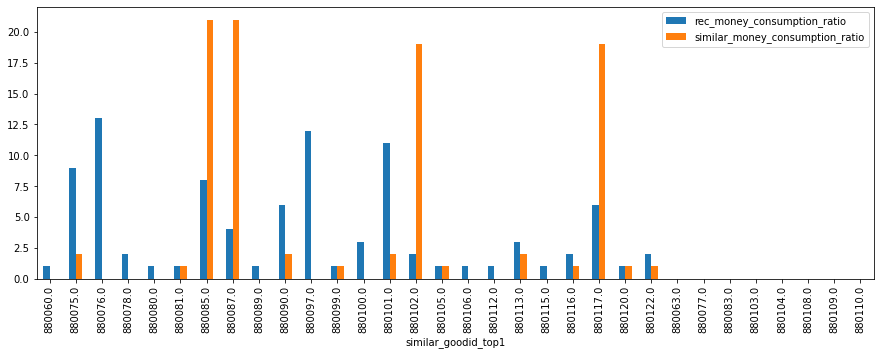

In [15]:
result_money_consumption_ratio[result_money_consumption_ratio['similar_goodid_top1'] != 0.0].plot(x = 'similar_goodid_top1', y = ['rec_money_consumption_ratio','similar_money_consumption_ratio'], kind = 'bar', figsize = (15,5))

In [16]:
result_money_consumption_ratio[result_money_consumption_ratio['similar_goodid_top1'] != 0.0]

,recommended_goodid_top1,rec_money_consumption,similar_goodid_top1,similar_money_consumption,rec_money_consumption_sum,rec_money_consumption_ratio,similar_money_consumption_sum,similar_money_consumption_ratio
0,880060.0,4.0,880060.0,3.0,680.0,1.0,735.0,0.0
3,880075.0,64.0,880075.0,12.0,680.0,9.0,735.0,2.0
4,880076.0,87.0,880076.0,3.0,680.0,13.0,735.0,0.0
5,880078.0,16.0,880078.0,3.0,680.0,2.0,735.0,0.0
6,880080.0,4.0,880080.0,3.0,680.0,1.0,735.0,0.0
7,880081.0,4.0,880081.0,6.0,680.0,1.0,735.0,1.0
9,880085.0,56.0,880085.0,156.0,680.0,8.0,735.0,21.0
11,880087.0,24.0,880087.0,151.0,680.0,4.0,735.0,21.0
12,880089.0,4.0,880089.0,3.0,680.0,1.0,735.0,0.0
13,880090.0,44.0,880090.0,15.0,680.0,6.0,735.0,2.0


In [17]:
# shoptrade_items_count_pivot = shoptrade_items_count.pivot(index = 'userrole', columns = 'shoptrade_id', values = 'avg_buy_count')

# shoptrade_items_count_pivot = shoptrade_items_count_pivot.fillna(0)
# shoptrade_items_count_pivot = shoptrade_items_count_pivot.astype(int)
# shoptrade_items_count_pivot


In [18]:
# #shoptrade record for similar user
# result_merge_similar = pd.merge(recommend_result, shoptrade_items_count_pivot, how = 'inner', left_on = ['similar'], right_on = ['userrole'])


# userrole_payment_reference = pd.read_csv("/home/chiseanchang66/python/g1jp/recommendation_sys/output/g1jp_userrole_payment_reference.csv", dtype = {'userrole' : object, 'payment_group' : object})
# result_similar_merge_payment_ref = pd.merge(result_merge_similar, userrole_payment_reference, how = 'inner', left_on = ['recommend_user'], right_on = ['userrole'])
# result_similar_merge_payment_ref = result_similar_merge_payment_ref.drop('userrole', axis = 1)
# result_similar_merge_payment_ref = result_similar_merge_payment_ref.rename(columns = {'payment_group' : 'recommend_payment_group'})

# result_similar_merge_payment_ref = pd.merge(result_similar_merge_payment_ref, userrole_payment_reference, how = 'inner', left_on = ['similar'], right_on = ['userrole'])
# result_similar_merge_payment_ref = result_similar_merge_payment_ref.drop('userrole', axis = 1)
# result_similar_merge_payment_ref = result_similar_merge_payment_ref.rename(columns = {'payment_group' : 'similar_user_payment_group'})
# result_similar_merge_payment_ref = result_similar_merge_payment_ref.drop_duplicates()


# #select the target group (based on payment category)
# target_group_similar = result_similar_merge_payment_ref[(result_similar_merge_payment_ref['recommend_payment_group'] == 'V4') & (result_similar_merge_payment_ref['similar_user_payment_group'] == 'V5')]

# target_group_similar

In [19]:
# #shoptrade record for recommended user
# result_merge_recommended = pd.merge(recommend_result, shoptrade_items_count_pivot, how = 'inner', left_on = ['recommend_user'], right_on = ['userrole'])


# userrole_payment_reference = pd.read_csv("/home/chiseanchang66/python/g1jp/recommendation_sys/output/g1jp_userrole_payment_reference.csv", dtype = {'userrole' : object, 'payment_group' : object})
# result_merge_recommended_payment_ref = pd.merge(result_merge_recommended, userrole_payment_reference, how = 'inner', left_on = ['recommend_user'], right_on = ['userrole'])
# result_merge_recommended_payment_ref = result_merge_recommended_payment_ref.drop('userrole', axis = 1)
# result_merge_recommended_payment_ref = result_merge_recommended_payment_ref.rename(columns = {'payment_group' : 'recommend_payment_group'})

# result_merge_recommended_payment_ref = pd.merge(result_merge_recommended_payment_ref, userrole_payment_reference, how = 'inner', left_on = ['similar'], right_on = ['userrole'])
# result_merge_recommended_payment_ref = result_merge_recommended_payment_ref.drop('userrole', axis = 1)
# result_merge_recommended_payment_ref = result_merge_recommended_payment_ref.rename(columns = {'payment_group' : 'similar_user_payment_group'})
# result_merge_recommended_payment_ref = result_merge_recommended_payment_ref.drop_duplicates()


# #select the target group (based on payment category)
# target_group_recommended = result_merge_recommended_payment_ref[(result_merge_recommended_payment_ref['recommend_payment_group'] == 'middle_R') & (result_merge_recommended_payment_ref['similar_user_payment_group'] == 'large_R')]

# target_group_recommended

In [20]:
target_group_recommended = f.drop(['similar','recommend_payment_group','similar_user_payment_group'], axis=1).set_index('recommend_user')
target_group_similar = target_group_similar.drop(['similar','recommend_payment_group','similar_user_payment_group'], axis=1).set_index('recommend_user')

AttributeError: '_XZFileText' object has no attribute 'drop'

In [ ]:
# target_group_recommended_top10 = pd.DataFrame()
# target_group_recommended_top10['recommended_goodid_top1'] = target_group_recommended.T.apply(lambda x: x.nlargest(1).idxmin())
# target_group_recommended_top10['recommended_goodid_top2'] = target_group_recommended.T.apply(lambda x: x.nlargest(2).idxmin())
# target_group_recommended_top10['recommended_goodid_top3'] = target_group_recommended.T.apply(lambda x: x.nlargest(3).idxmin())
# target_group_recommended_top10['recommended_goodid_top4'] = target_group_recommended.T.apply(lambda x: x.nlargest(4).idxmin())
# target_group_recommended_top10['recommended_goodid_top5'] = target_group_recommended.T.apply(lambda x: x.nlargest(5).idxmin())
# target_group_recommended_top10['recommended_goodid_top6'] = target_group_recommended.T.apply(lambda x: x.nlargest(6).idxmin())
# target_group_recommended_top10['recommended_goodid_top7'] = target_group_recommended.T.apply(lambda x: x.nlargest(7).idxmin())
# target_group_recommended_top10['recommended_goodid_top8'] = target_group_recommended.T.apply(lambda x: x.nlargest(8).idxmin())
# target_group_recommended_top10['recommended_goodid_top9'] = target_group_recommended.T.apply(lambda x: x.nlargest(9).idxmin())
# target_group_recommended_top10['recommended_goodid_top10'] = target_group_recommended.T.apply(lambda x: x.nlargest(10).idxmin())
# target_group_recommended_top10

# target_group_similar_top10 = pd.DataFrame()
# target_group_similar_top10['similar_goodid_top1'] = target_group_similar.T.apply(lambda x: x.nlargest(1).idxmin())
# target_group_similar_top10['similar_goodid_top2'] = target_group_similar.T.apply(lambda x: x.nlargest(2).idxmin())
# target_group_similar_top10['similar_goodid_top3'] = target_group_similar.T.apply(lambda x: x.nlargest(3).idxmin())
# target_group_similar_top10['similar_goodid_top4'] = target_group_similar.T.apply(lambda x: x.nlargest(4).idxmin())
# target_group_similar_top10['similar_goodid_top5'] = target_group_similar.T.apply(lambda x: x.nlargest(5).idxmin())
# target_group_similar_top10['similar_goodid_top6'] = target_group_similar.T.apply(lambda x: x.nlargest(6).idxmin())
# target_group_similar_top10['similar_goodid_top7'] = target_group_similar.T.apply(lambda x: x.nlargest(7).idxmin())
# target_group_similar_top10['similar_goodid_top8'] = target_group_similar.T.apply(lambda x: x.nlargest(8).idxmin())
# target_group_similar_top10['similar_goodid_top9'] = target_group_similar.T.apply(lambda x: x.nlargest(9).idxmin())
# target_group_similar_top10['similar_goodid_top10'] = target_group_similar.T.apply(lambda x: x.nlargest(10).idxmin())
# target_group_similar_top10

In [ ]:
# recommend_in_avg = pd.merge(target_group_recommended_top10,target_group_similar_top10,on = 'recommend_user').dropna().drop_duplicates()

# #recommend by avg_buy_times
# recommend_in_avg_list = recommend_in_avg.groupby(['recommended_goodid_top1']).size().to_frame('rec_buy_avg').reset_index()
# similar_in_avg_list = recommend_in_avg.groupby(['similar_goodid_top1']).size().to_frame('similar_buy_avg').reset_index()

# result_avg = pd.merge(recommend_in_avg_list,similar_in_avg_list, how = 'outer', left_on = ['recommended_goodid_top1'], right_on = ['similar_goodid_top1'])
# result_avg

In [ ]:
# result_avg.plot(x = 'recommended_goodid_top1', y = ['rec_buy_avg','similar_buy_avg'], kind = 'bar', figsize = (15,8))

In [ ]:
# for cols in target_group_similar.columns[2:-2]:
#     target_group_similar[cols] = target_group_similar[cols].apply(lambda x: 0 if int(x) == 0 else 1)
# target_group_similar_times=target_group_similar.groupby(['recommend_user']).sum()

# for cols in target_group_recommended.columns[2:-2]:
#     target_group_recommended[cols] = target_group_recommended[cols].apply(lambda x: 0 if int(x) == 0 else 1)
# target_group_recommended_times=target_group_recommended.groupby(['recommend_user']).sum()

In [ ]:
# target_group_recommended_times_top10 = pd.DataFrame()
# target_group_recommended_times_top10['recommended_goodid_top1'] = target_group_recommended_times.T.apply(lambda x: x.nlargest(1).idxmin())
# target_group_recommended_times_top10['recommended_goodid_top2'] = target_group_recommended_times.T.apply(lambda x: x.nlargest(2).idxmin())
# target_group_recommended_times_top10['recommended_goodid_top3'] = target_group_recommended_times.T.apply(lambda x: x.nlargest(3).idxmin())
# target_group_recommended_times_top10['recommended_goodid_top4'] = target_group_recommended_times.T.apply(lambda x: x.nlargest(4).idxmin())
# target_group_recommended_times_top10['recommended_goodid_top5'] = target_group_recommended_times.T.apply(lambda x: x.nlargest(5).idxmin())
# target_group_recommended_times_top10['recommended_goodid_top6'] = target_group_recommended_times.T.apply(lambda x: x.nlargest(6).idxmin())
# target_group_recommended_times_top10['recommended_goodid_top7'] = target_group_recommended_times.T.apply(lambda x: x.nlargest(7).idxmin())
# target_group_recommended_times_top10['recommended_goodid_top8'] = target_group_recommended_times.T.apply(lambda x: x.nlargest(8).idxmin())
# target_group_recommended_times_top10['recommended_goodid_top9'] = target_group_recommended_times.T.apply(lambda x: x.nlargest(9).idxmin())
# target_group_recommended_times_top10['recommended_goodid_top10'] = target_group_recommended_times.T.apply(lambda x: x.nlargest(10).idxmin())
# target_group_recommended_times_top10

In [ ]:
# target_group_similar_times_top10 = pd.DataFrame()
# target_group_similar_times_top10['similar_goodid_top1'] = target_group_similar_times.T.apply(lambda x: x.nlargest(1).idxmin())
# target_group_similar_times_top10['similar_goodid_top2'] = target_group_similar_times.T.apply(lambda x: x.nlargest(2).idxmin())
# target_group_similar_times_top10['similar_goodid_top3'] = target_group_similar_times.T.apply(lambda x: x.nlargest(3).idxmin())
# target_group_similar_times_top10['similar_goodid_top4'] = target_group_similar_times.T.apply(lambda x: x.nlargest(4).idxmin())
# target_group_similar_times_top10['similar_goodid_top5'] = target_group_similar_times.T.apply(lambda x: x.nlargest(5).idxmin())
# target_group_similar_times_top10['similar_goodid_top6'] = target_group_similar_times.T.apply(lambda x: x.nlargest(6).idxmin())
# target_group_similar_times_top10['similar_goodid_top7'] = target_group_similar_times.T.apply(lambda x: x.nlargest(7).idxmin())
# target_group_similar_times_top10['similar_goodid_top8'] = target_group_similar_times.T.apply(lambda x: x.nlargest(8).idxmin())
# target_group_similar_times_top10['similar_goodid_top9'] = target_group_similar_times.T.apply(lambda x: x.nlargest(9).idxmin())
# target_group_similar_times_top10['similar_goodid_top10'] = target_group_similar_times.T.apply(lambda x: x.nlargest(10).idxmin())
# target_group_similar_times_top10

In [ ]:
# recommend_list = pd.merge(target_group_recommended_times_top10,target_group_similar_times_top10,on = 'recommend_user').dropna().drop_duplicates()

# recommend_in_times_list = recommend_list.groupby(['recommended_goodid_top1']).size().to_frame('rec_buy_times').reset_index()
# similar_in_times_list = recommend_list.groupby(['similar_goodid_top1']).size().to_frame('similar_buy_times').reset_index()

# result_buy_times = pd.merge(recommend_in_times_list,similar_in_times_list, how = 'outer', left_on = ['recommended_goodid_top1'], right_on = ['similar_goodid_top1'])
# result_buy_times

In [ ]:
# result_buy_times.plot(x = 'recommended_goodid_top1', y = ['rec_buy_times','similar_buy_times'], kind = 'bar', figsize = (15,8))

In [ ]:
# #switch to diamond consumption, in terns of total diamond consumption

# shoptrade_money_consumption_pivot = shoptrade_items_money_sum.pivot(index = 'userrole', columns = 'shoptrade_id', values = 'total_money')

# shoptrade_money_consumption_pivot = shoptrade_money_consumption_pivot.fillna(0)
# shoptrade_money_consumption_pivot = shoptrade_money_consumption_pivot.astype(int)
# shoptrade_money_consumption_pivot

# #record of shoptrade money consumption for similar user
# money_consumption_merge_similar = pd.merge(recommend_result, shoptrade_money_consumption_pivot, how = 'inner', left_on = ['similar'], right_on = ['userrole'])


# userrole_payment_reference = pd.read_csv("/home/chiseanchang66/python/g1jp/recommendation_sys/output/g1jp_userrole_payment_reference.csv", dtype = {'userrole' : object, 'payment_group' : object})
# money_consumption_merge_similar_payment_ref = pd.merge(money_consumption_merge_similar, userrole_payment_reference, how = 'inner', left_on = ['recommend_user'], right_on = ['userrole'])
# money_consumption_merge_similar_payment_ref = money_consumption_merge_similar_payment_ref.drop('userrole', axis = 1)
# money_consumption_merge_similar_payment_ref = money_consumption_merge_similar_payment_ref.rename(columns = {'payment_group' : 'recommend_payment_group'})

# money_consumption_merge_similar_payment_ref = pd.merge(money_consumption_merge_similar_payment_ref, userrole_payment_reference, how = 'inner', left_on = ['similar'], right_on = ['userrole'])
# money_consumption_merge_similar_payment_ref = money_consumption_merge_similar_payment_ref.drop('userrole', axis = 1)
# money_consumption_merge_similar_payment_ref = money_consumption_merge_similar_payment_ref.rename(columns = {'payment_group' : 'similar_user_payment_group'})
# money_consumption_merge_similar_payment_ref = money_consumption_merge_similar_payment_ref.drop_duplicates()


# #select the target group (based on payment category)
# money_consumption_result_similar = money_consumption_merge_similar_payment_ref[(money_consumption_merge_similar_payment_ref['recommend_payment_group'] == 'middle_R') & (money_consumption_merge_similar_payment_ref['similar_user_payment_group'] == 'large_R')]

# money_consumption_result_similar

# #record of shoptrade money consumption for recommended user
# money_consumption_merge_recommended = pd.merge(recommend_result, shoptrade_money_consumption_pivot, how = 'inner', left_on = ['recommend_user'], right_on = ['userrole'])


# userrole_payment_reference = pd.read_csv("/home/chiseanchang66/python/g1jp/recommendation_sys/output/g1jp_userrole_payment_reference.csv", dtype = {'userrole' : object, 'payment_group' : object})
# money_consumption_merge_recommended_payment_ref = pd.merge(money_consumption_merge_recommended, userrole_payment_reference, how = 'inner', left_on = ['recommend_user'], right_on = ['userrole'])
# money_consumption_merge_recommended_payment_ref = money_consumption_merge_recommended_payment_ref.drop('userrole', axis = 1)
# money_consumption_merge_recommended_payment_ref = money_consumption_merge_recommended_payment_ref.rename(columns = {'payment_group' : 'recommend_payment_group'})

# money_consumption_merge_recommended_payment_ref = pd.merge(money_consumption_merge_recommended_payment_ref, userrole_payment_reference, how = 'inner', left_on = ['similar'], right_on = ['userrole'])
# money_consumption_merge_recommended_payment_ref = money_consumption_merge_recommended_payment_ref.drop('userrole', axis = 1)
# money_consumption_merge_recommended_payment_ref = money_consumption_merge_recommended_payment_ref.rename(columns = {'payment_group' : 'similar_user_payment_group'})
# money_consumption_merge_recommended_payment_ref = money_consumption_merge_recommended_payment_ref.drop_duplicates()


# #select the target group (based on payment category)
# money_consumption_result_recommended = money_consumption_merge_recommended_payment_ref[(money_consumption_merge_recommended_payment_ref['recommend_payment_group'] == 'middle_R') & (money_consumption_merge_recommended_payment_ref['similar_user_payment_group'] == 'large_R')]

# money_consumption_result_recommended

# money_consumption_result_recommended = money_consumption_result_recommended.drop(['similar','recommend_payment_group','similar_user_payment_group'], axis=1).set_index('recommend_user')
# money_consumption_result_similar = money_consumption_result_similar.drop(['similar','recommend_payment_group','similar_user_payment_group'], axis=1).set_index('recommend_user')